In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
cars_data=pd.read_csv('cars_sampled.csv')
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [3]:
cars=cars_data.copy()

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [5]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [6]:
col=['name', 'dateCrawled', 'postalCode', 'lastSeen']
cars=cars.drop(col, axis=1)

In [7]:
cars.drop_duplicates(keep='first', inplace=True)

In [8]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5181
yearOfRegistration        0
gearbox                2813
powerPS                   0
model                  2751
kilometer                 0
monthOfRegistration       0
fuelType               4493
brand                     0
notRepairedDamage      9705
dateCreated               0
dtype: int64

In [9]:
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,10/3/2016 0:00
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,14/03/2016 0:00
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no,14/03/2016 0:00
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no,23/03/2016 0:00


In [10]:
cars['monthOfRegistration']/=12

# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count    43018.000000
mean        14.864021
std          7.086825
min          0.000000
25%         10.250000
50%         14.830000
75%         19.170000
max         67.750000
Name: Age, dtype: float64

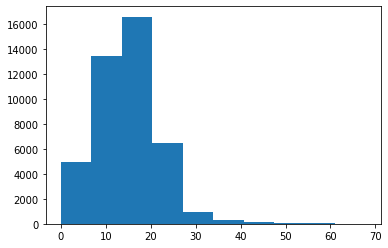

In [11]:
plt.hist(cars['Age'])
plt.show()

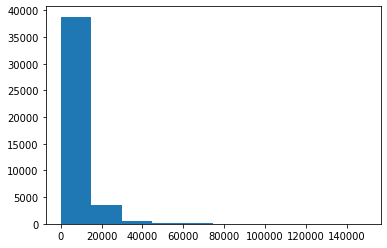

In [12]:
plt.hist(cars['price'])
plt.show()

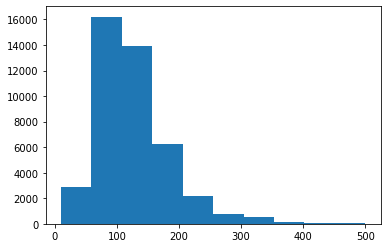

In [13]:
plt.hist(cars['powerPS'])
plt.show()

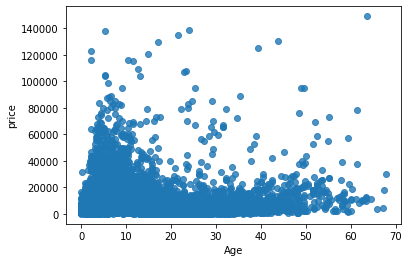

In [14]:
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)
plt.show()

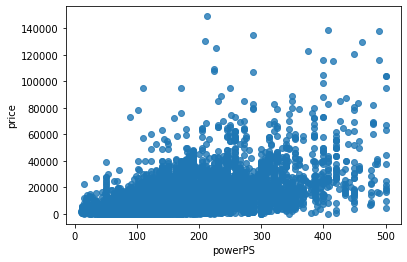

In [15]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)
plt.show()

In [16]:
cars['seller'].value_counts()

private       43017
commercial        1
Name: seller, dtype: int64

In [17]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000023
private,0.999977


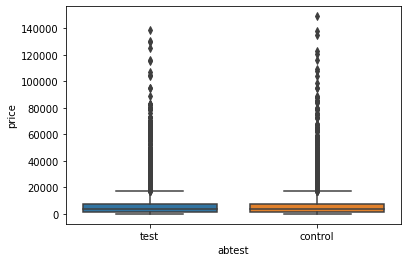

In [18]:
sns.boxplot(x= 'abtest',y='price',data=cars)
plt.show()

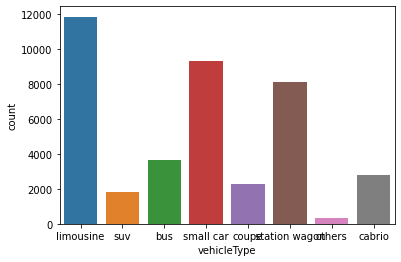

In [19]:
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x= 'vehicleType',data=cars)
plt.show()

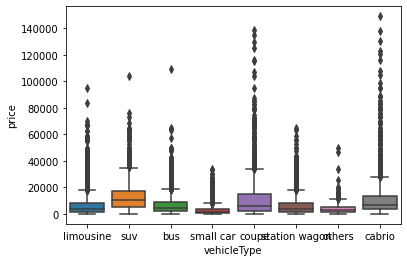

In [20]:
sns.boxplot(x= 'vehicleType',y='price',data=cars)
plt.show()

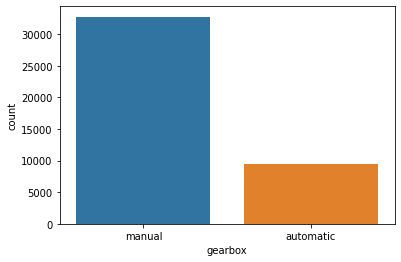

In [21]:
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x= 'gearbox',data=cars)
plt.show()

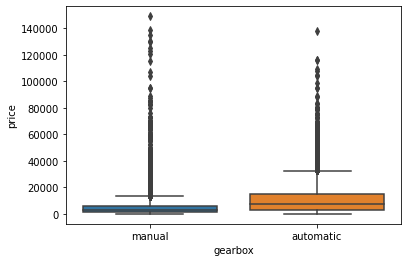

In [22]:
sns.boxplot(x= 'gearbox',y='price',data=cars)
plt.show()

<AxesSubplot: xlabel='kilometer', ylabel='price'>

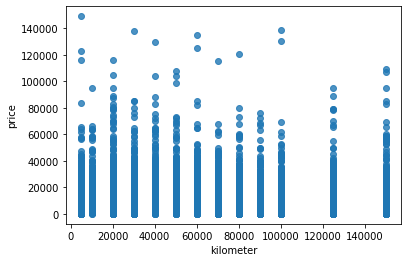

In [23]:
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)

<AxesSubplot: xlabel='fuelType', ylabel='count'>

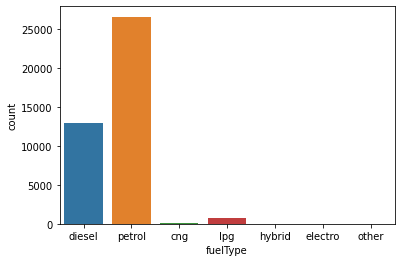

In [24]:
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x= 'fuelType',data=cars)

<AxesSubplot: xlabel='notRepairedDamage', ylabel='count'>

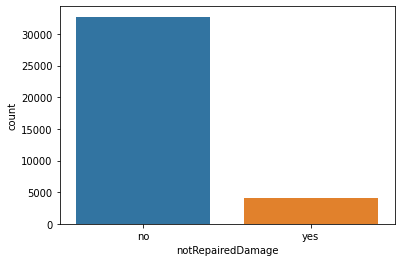

In [25]:
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x= 'notRepairedDamage',data=cars)

<AxesSubplot: xlabel='notRepairedDamage', ylabel='price'>

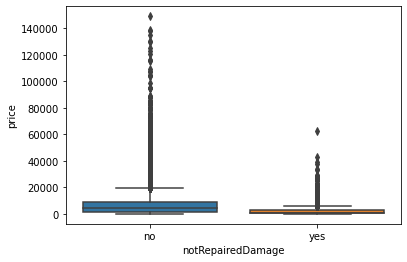

In [26]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)

In [27]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [28]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:] 

powerPS                0.575786
kilometer              0.440454
yearOfRegistration     0.338888
Age                    0.336793
monthOfRegistration    0.050621
Name: price, dtype: float64

# delete missing rows

In [29]:
carsO=cars.dropna(axis=0)

In [30]:
carsO=pd.get_dummies(carsO, drop_first=True)

In [31]:
x1=carsO.drop(['price'], axis=1, inplace=False)
y1=carsO['price']

array([[<AxesSubplot: title={'center': '1. Before'}>,
        <AxesSubplot: title={'center': '2. After'}>]], dtype=object)

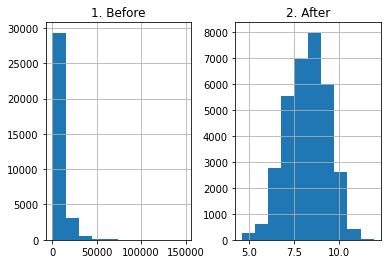

In [32]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [33]:
y1 = np.log(y1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23172, 368) (9932, 368) (23172,) (9932,)


In [35]:
base_pred = np.mean(y_test)
print(base_pred)

8.270743539184664


In [36]:
base_pred = np.repeat(base_pred, len(y_test))
base_pred

array([8.27074354, 8.27074354, 8.27074354, ..., 8.27074354, 8.27074354,
       8.27074354])

In [37]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))

In [38]:
print(base_root_mean_square_error)

1.1166178232729265


# random forest

In [39]:
rf = RandomForestRegressor(n_estimators = 100,
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [40]:
model_rf1=rf.fit(X_train,y_train)

In [41]:
cars_predictions_rf1 = rf.predict(X_test)

In [42]:
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.41328101755064184


In [43]:
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1) 

0.8630122271938306 0.921635477139483
